Group Number: 15

Section: 52740

Student Name: Arianna Zhao

Student UT EID: axz83

Student Name: Victor Fonseca

Student UT EID: VRF262

Student Name: Nibhan Akbar

Student UT EID: na26287

Student Name: Raul Denicolas

Student UT EID: rd32483

Date: 09/29/23


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

Sanity Checks

In [3]:
df = pd.read_csv("cars_clean.csv")
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,198,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [5]:
df.shape

(201, 27)

In [6]:
df.head(5)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [7]:
df.tail(5)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,196,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,198,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    int64  
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [9]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,58.167861,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,0.000000,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,50.000000,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,100.000000,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,150.000000,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,200.000000,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Correlation Check

In [10]:
corr_df=df.corr(numeric_only=True)
corr_df

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155


Q1

In [11]:
corr_df["price"]=corr_df["price"].abs()
corr_df.sort_values(by=["price"], ascending=False,inplace=True)
corr_df["price"]

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
width                0.751265
highway-mpg          0.704692
length               0.690628
city-mpg             0.686571
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
Unnamed: 0           0.118214
peak-rpm             0.101616
symboling            0.082391
stroke               0.082269
compression-ratio    0.071107
Name: price, dtype: float64

Q2

In [12]:
pearson_coeff, p_value=stats.pearsonr(df["engine-size"],df["price"])
print("engine-size\tCorrelation coeff=",pearson_coeff, "p-value=", p_value)

pearson_coeff, p_value=stats.pearsonr(df["curb-weight"],df["price"])
print("curb-weight\tCorrelation coeff=",pearson_coeff, "p-value=", p_value)

pearson_coeff, p_value=stats.pearsonr(df["horsepower"],df["price"])
print("horsepower\tCorrelation coeff=",pearson_coeff, "p-value=", p_value)

pearson_coeff, p_value=stats.pearsonr(df["width"],df["price"])
print("width\t\tCorrelation coeff=",pearson_coeff, "p-value=", p_value)

pearson_coeff, p_value=stats.pearsonr(df["highway-mpg"],df["price"])
print("highway-mpg\tCorrelation coeff=",pearson_coeff, "p-value=", p_value)

pearson_coeff, p_value=stats.pearsonr(df["length"],df["price"])
print("length\t\tCorrelation coeff=",pearson_coeff, "p-value=", p_value)

engine-size	Correlation coeff= 0.8723351674455185 p-value= 9.265491622198793e-64
curb-weight	Correlation coeff= 0.8344145257702843 p-value= 2.189577238893965e-53
horsepower	Correlation coeff= 0.8095745670036559 p-value= 6.369057428259557e-48
width		Correlation coeff= 0.7512653440522674 p-value= 9.20033551048144e-38
highway-mpg	Correlation coeff= -0.704692265058953 p-value= 1.749547114447557e-31
length		Correlation coeff= 0.6906283804483639 p-value= 8.01647746615924e-30


Q3

[Text(0.5, 1.0, 'Engine Size and Price')]

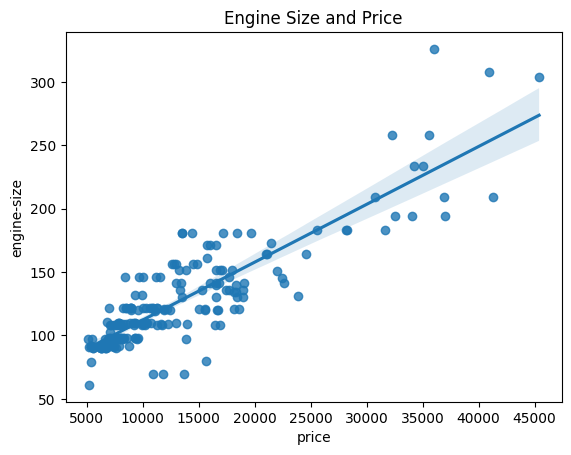

In [13]:
sns.regplot(data=df, x="price", y="engine-size").set(title="Engine Size and Price")

[Text(0.5, 1.0, 'Curb Weight and Price')]

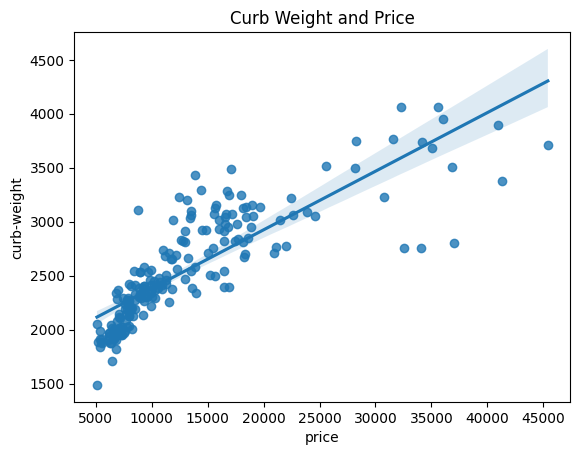

In [14]:
sns.regplot(data=df, x="price", y="curb-weight").set(title="Curb Weight and Price")

[Text(0.5, 1.0, 'Horespower and Price')]

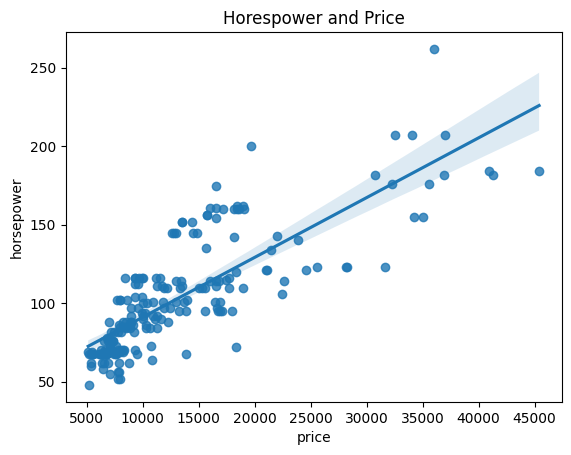

In [15]:
sns.regplot(data=df, x="price", y="horsepower").set(title="Horespower and Price")

[Text(0.5, 1.0, 'Width and Price')]

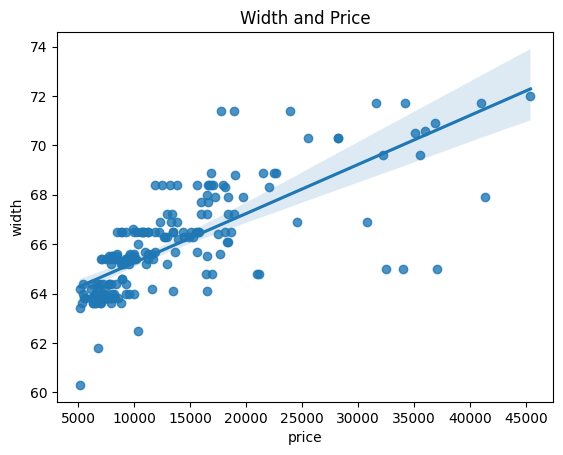

In [16]:
sns.regplot(data=df, x="price", y="width").set(title="Width and Price")

[Text(0.5, 1.0, 'Highway-MPG and Price')]

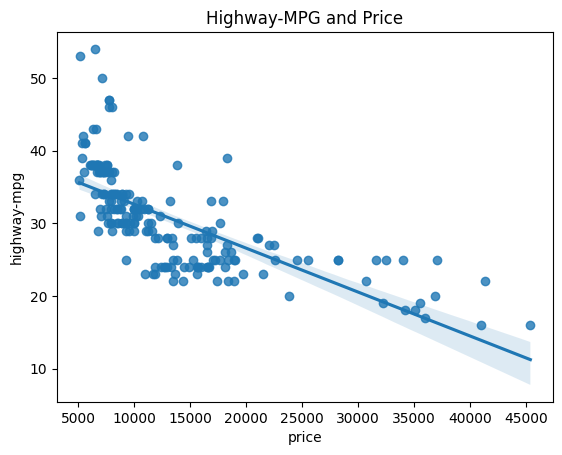

In [17]:
sns.regplot(data=df, x="price", y="highway-mpg").set(title="Highway-MPG and Price")

[Text(0.5, 1.0, 'Length and Price')]

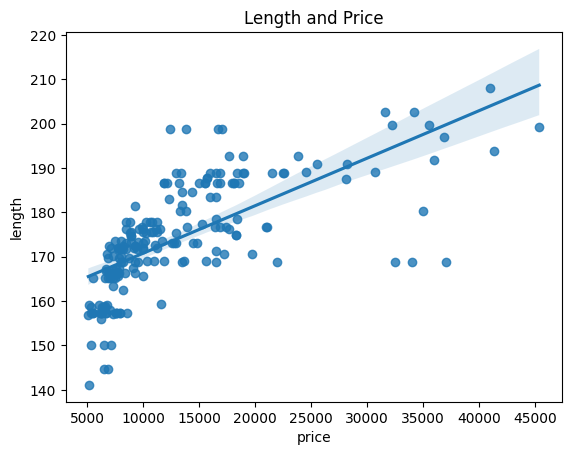

In [18]:
sns.regplot(data=df, x="price", y="length").set(title="Length and Price")

Q4

In [19]:
parameters=["engine-size", "curb-weight", "horsepower", "width","highway-mpg","length"]
slopes=[]
intercepts=[]
r2=[]

predicted=[]
actual=[]
residual=[]
for i in parameters:
    lm=LinearRegression()
    lm.fit(df[[i]],df["price"])
    slopes.append(lm.coef_[0])
    intercepts.append(lm.intercept_)
    r2.append(lm.score(df[[i]],df["price"]))
    predicted.append(lm.predict(df[[i]]))

LR_table=pd.DataFrame()
LR_table["Parameter"]=["engine-size", "curb-weight", "horsepower", "width","highway-mpg","length"]
LR_table["Slope"]=slopes
LR_table["Intercept"]=intercepts
LR_table["R^2"]=r2

LR_table
#predicted

,Parameter,Slope,Intercept,R^2
0,engine-size,166.860016,-7963.338906,0.760969
1,curb-weight,12.818847,-19553.570636,0.696248
2,horsepower,172.183122,-4597.558298,0.655411
3,width,2841.036609,-173986.087282,0.564400
4,highway-mpg,-821.733378,38423.305858,0.496591
5,length,445.414021,-64384.436327,0.476968


Q5

In [20]:
df['pred_engine'] = predicted[0].tolist()
df['pred_curb'] = predicted[1].tolist()
df['pred_horse'] = predicted[2].tolist()
df['pred_width'] = predicted[3].tolist()
df['pred_mpg'] = predicted[4].tolist()
df['pred_length'] = predicted[5].tolist()
df.head(5)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,peak-rpm,city-mpg,highway-mpg,price,pred_engine,pred_curb,pred_horse,pred_width,pred_mpg,pred_length
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,5000.0,21,27,13495,13728.463134,13108.851526,14514.768234,8124.359379,16236.504643,10801.450441
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,5000.0,21,27,16500,13728.463134,13108.851526,14514.768234,8124.359379,16236.504643,10801.450441
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,5000.0,19,26,16500,17399.383479,16634.034452,21918.642477,12101.810633,17058.238022,11870.444092
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,5500.0,24,30,13950,10224.402804,10404.074809,12965.120137,14090.536259,13771.304508,14275.679806
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,5500.0,18,22,17450,14729.623228,16646.853299,15203.500722,14658.743581,20345.171535,14275.679806


In [21]:
df['res_engine'] = df['price']-df['pred_engine']
df['res_curb'] = df['price']-df['pred_curb']
df['res_horse'] = df['price']-df['pred_horse']
df['res_width'] = df['price']-df['pred_width']
df['res_mpg'] = df['price']-df['pred_mpg']
df['res_length'] = df['price']-df['pred_length']
df.head(5)


,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,pred_horse,pred_width,pred_mpg,pred_length,res_engine,res_curb,res_horse,res_width,res_mpg,res_length
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,14514.768234,8124.359379,16236.504643,10801.450441,-233.463134,386.148474,-1019.768234,5370.640621,-2741.504643,2693.549559
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,14514.768234,8124.359379,16236.504643,10801.450441,2771.536866,3391.148474,1985.231766,8375.640621,263.495357,5698.549559
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,21918.642477,12101.810633,17058.238022,11870.444092,-899.383479,-134.034452,-5418.642477,4398.189367,-558.238022,4629.555908
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,12965.120137,14090.536259,13771.304508,14275.679806,3725.597196,3545.925191,984.879863,-140.536259,178.695492,-325.679806
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,15203.500722,14658.743581,20345.171535,14275.679806,2720.376772,803.146701,2246.499278,2791.256419,-2895.171535,3174.320194


Text(0.5, 1.0, 'Engine Size vs Predicted Price Residuals')

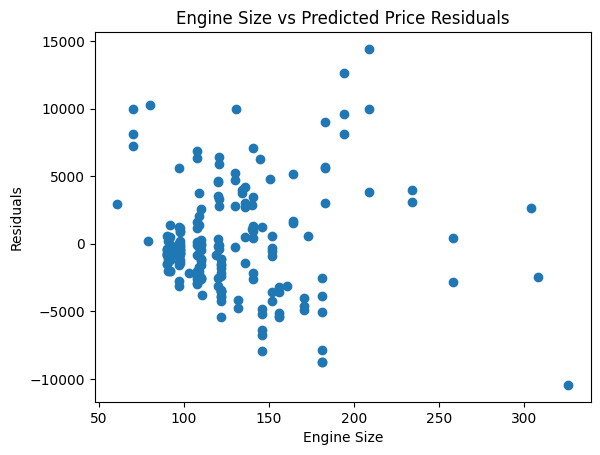

In [22]:
plt.scatter(df['engine-size'],df['res_engine'])
plt.xlabel('Engine Size')
plt.ylabel('Residuals')
plt.title('Engine Size vs Predicted Price Residuals')

Text(0.5, 1.0, 'Curb Weight vs Predicted Price Residuals')

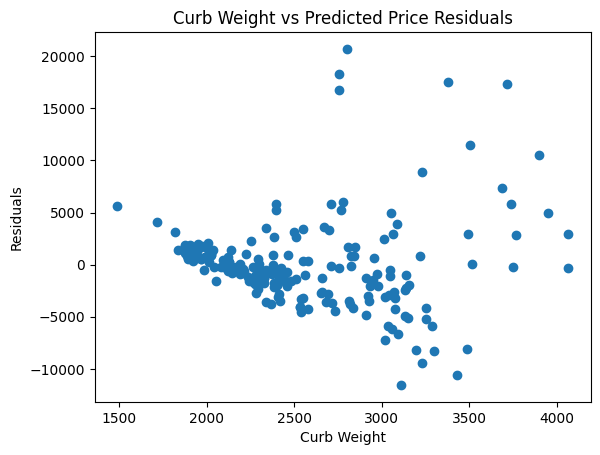

In [23]:
plt.scatter(df['curb-weight'],df['res_curb'])
plt.xlabel('Curb Weight')
plt.ylabel('Residuals')
plt.title('Curb Weight vs Predicted Price Residuals')

Text(0.5, 1.0, 'Horsepower vs Predicted Price Residuals')

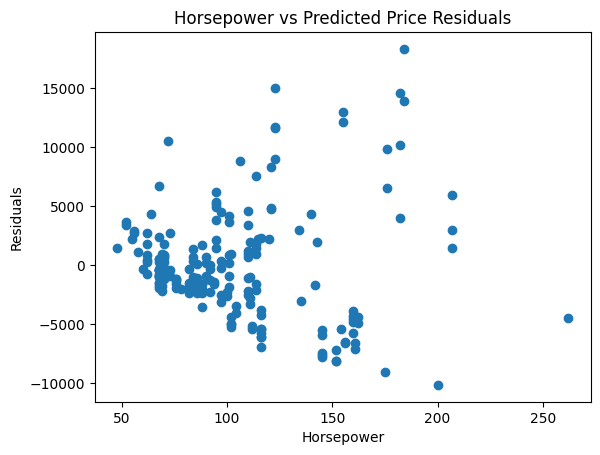

In [24]:
plt.scatter(df['horsepower'],df['res_horse'])
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.title('Horsepower vs Predicted Price Residuals')

Text(0.5, 1.0, 'Width vs Predicted Price Residuals')

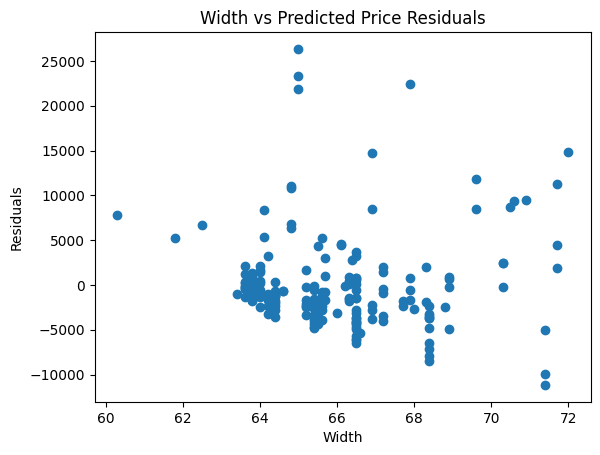

In [25]:
plt.scatter(df['width'],df['res_width'])
plt.xlabel('Width')
plt.ylabel('Residuals')
plt.title('Width vs Predicted Price Residuals')

Text(0.5, 1.0, 'Highway MPG vs Predicted Price Residuals')

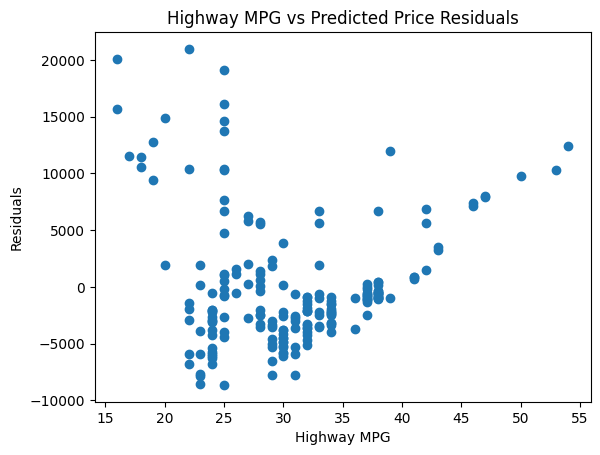

In [26]:
plt.scatter(df['highway-mpg'],df['res_mpg'])
plt.xlabel('Highway MPG')
plt.ylabel('Residuals')
plt.title('Highway MPG vs Predicted Price Residuals')

Text(0.5, 1.0, 'Length vs Predicted Price Residuals')

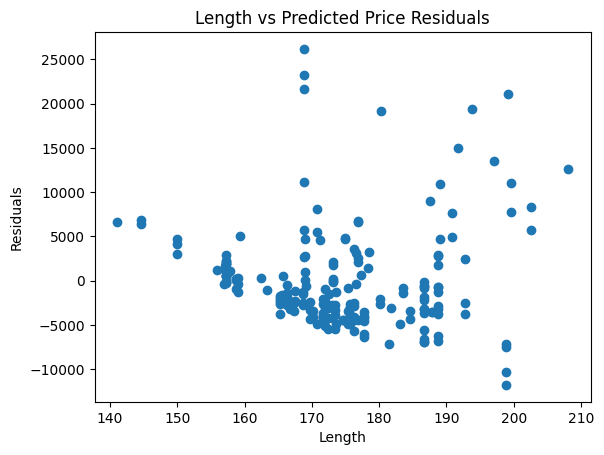

In [27]:
plt.scatter(df['length'],df['res_length'])
plt.xlabel('Length')
plt.ylabel('Residuals')
plt.title('Length vs Predicted Price Residuals')

Q7

In [28]:
# define predictors with multiple parameters
mr=df[["engine-size", "width"]]
#create linear regression model
lm=LinearRegression()
lm.fit(mr, df["price"])
#intercept value
print("intercept",lm.intercept_)
print("Slope", lm.coef_)
print("R-Squared:", lm.score(mr,df["price"]))

intercept -64827.2063185498
Slope [132.58314769 929.0278425 ]
R-Squared: 0.7892086972368931


Q8

In [29]:
df["Predicted_Price"]= (df["engine-size"]*132.58)+(df["width"]*929.03)-64827.21
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,pred_width,pred_mpg,pred_length,res_engine,res_curb,res_horse,res_width,res_mpg,res_length,Predicted_Price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,8124.359379,16236.504643,10801.450441,-233.463134,386.148474,-1019.768234,5370.640621,-2741.504643,2693.549559,11959.013
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,8124.359379,16236.504643,10801.450441,2771.536866,3391.148474,1985.231766,8375.640621,263.495357,5698.549559,11959.013
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,12101.810633,17058.238022,11870.444092,-899.383479,-134.034452,-5418.642477,4398.189367,-558.238022,4629.555908,16176.415
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,14090.536259,13771.304508,14275.679806,3725.597196,3545.925191,984.879863,-140.536259,178.695492,-325.679806,11125.796
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,14658.743581,20345.171535,14275.679806,2720.376772,803.146701,2246.499278,2791.256419,-2895.171535,3174.320194,14891.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,-1,95,volvo,gas,std,four,sedan,rwd,front,...,21761.335104,15414.771265,19709.730864,1281.076694,-1442.665715,1813.682400,-4916.335104,1430.228735,-2864.730864,17876.737
197,197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,21477.231444,17879.971400,19709.730864,3481.076694,-486.093874,-3906.741208,-2432.231444,1165.028600,-664.730864,17783.834
198,198,-1,95,volvo,gas,std,four,sedan,rwd,front,...,21761.335104,19523.438157,19709.730864,581.556192,2428.203465,3010.019962,-276.335104,1961.561843,1775.269136,22119.297
199,199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,21761.335104,16236.504643,19709.730864,6238.636631,785.339829,8816.147375,708.664896,6233.495357,2760.269136,18407.057


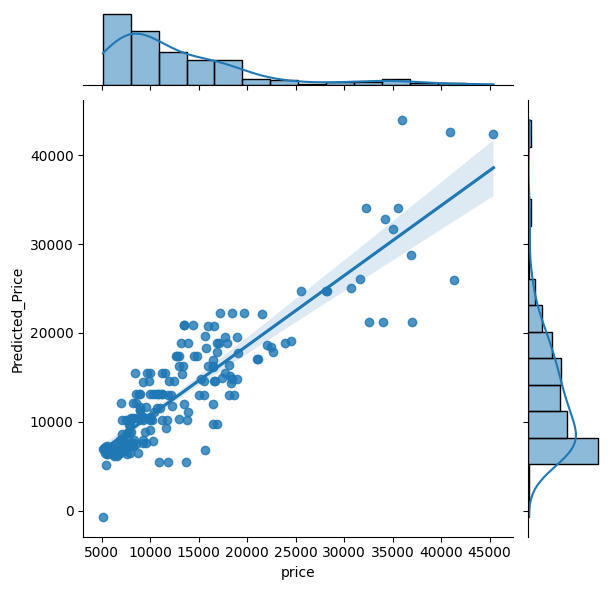

In [30]:
sns.jointplot(df, x="price", y="Predicted_Price", kind="reg")

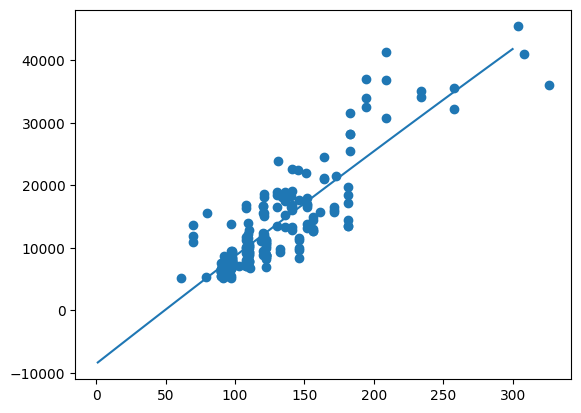

In [31]:
model = np.poly1d(np.polyfit(df['engine-size'], df['price'], 2))
polyline = np.linspace(1, 300, 50)
plt.scatter(df['engine-size'], df['price'])
plt.plot(polyline, model(polyline))
plt.show()

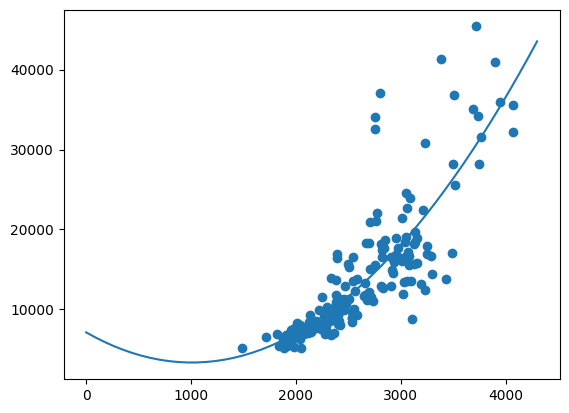

In [32]:
model = np.poly1d(np.polyfit(df['curb-weight'], df['price'], 2))
polyline = np.linspace(1, 4300, 50)
plt.scatter(df['curb-weight'], df['price'])
plt.plot(polyline, model(polyline))
plt.show()

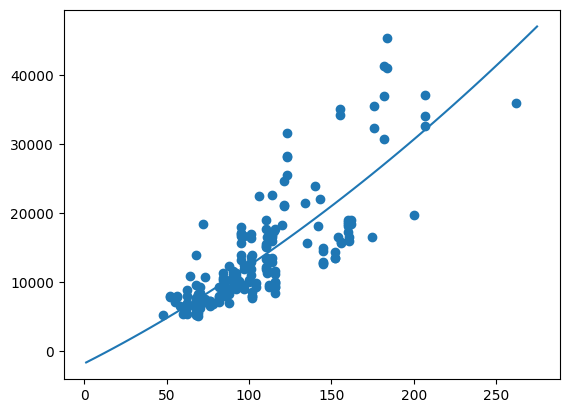

In [33]:
model = np.poly1d(np.polyfit(df['horsepower'], df['price'], 2))
polyline = np.linspace(1, 275, 50)
plt.scatter(df['horsepower'], df['price'])
plt.plot(polyline, model(polyline))
plt.show()

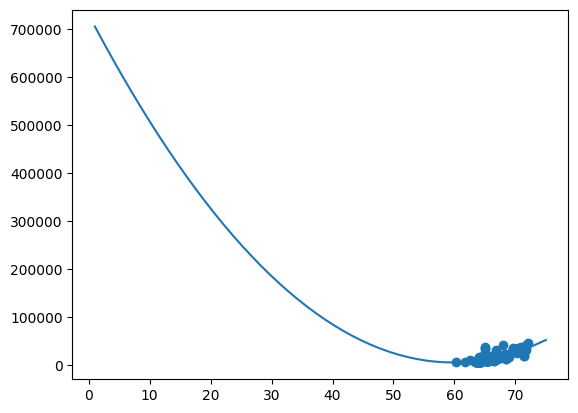

In [34]:
model = np.poly1d(np.polyfit(df['width'], df['price'], 2))
polyline = np.linspace(1, 75, 50)
plt.scatter(df['width'], df['price'])
plt.plot(polyline, model(polyline))
plt.show()

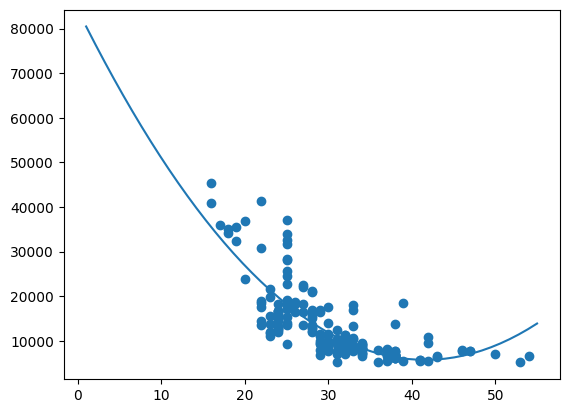

In [35]:
model = np.poly1d(np.polyfit(df['highway-mpg'], df['price'], 2))
polyline = np.linspace(1, 55, 50)
plt.scatter(df['highway-mpg'], df['price'])
plt.plot(polyline, model(polyline))
plt.show()

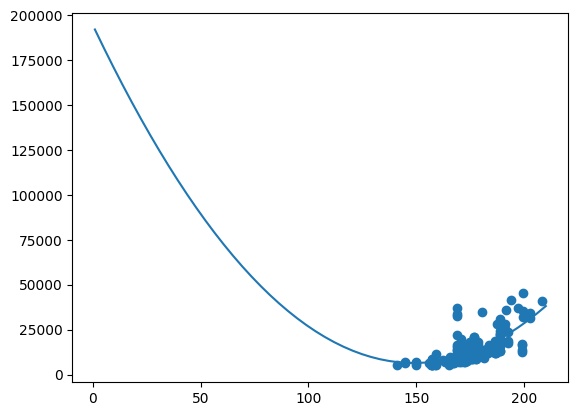

In [36]:
model = np.poly1d(np.polyfit(df['length'], df['price'], 2))
polyline = np.linspace(1, 210, 50)
plt.scatter(df['length'], df['price'])
plt.plot(polyline, model(polyline))
plt.show()